In [323]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

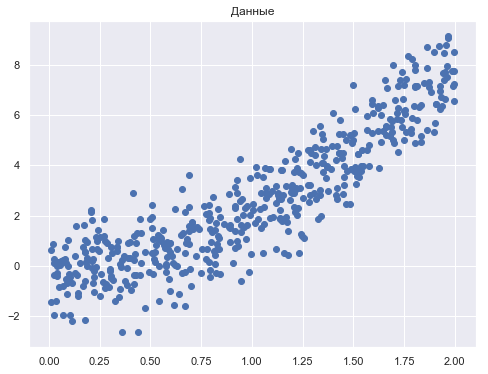

In [324]:
# данные

X = 2 * np.random.rand(500, 1)
y =  2*X*X+np.random.randn(500, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Данные")
plt.show()

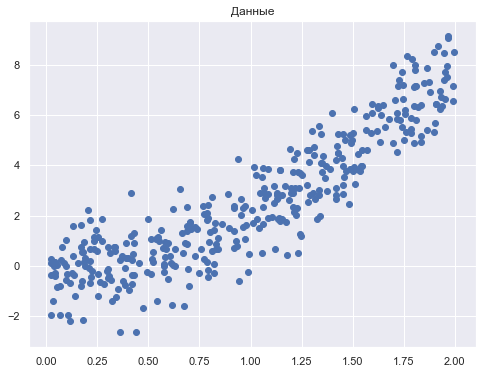

In [325]:
# разделим данные на обучающие и тестовые
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)
plt.title("Данные")
plt.show()

In [326]:
class LinearRegression:
    
    def __init__(self):
        pass
    
    # Метод 1 - градиентный спуск
    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iters=100): # learning_rate - темп обучения
        # инициализируем вектор весов (w) и вектор смщений (b)
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(n_features,1))
        self.bias = 0
        costs = []

        for i in range(n_iters):
            # считаем y = X*w + b
            y_predict = np.dot(X, self.weights) + self.bias

            # считаем функцию потерь 
            cost = (1 / n_samples) * np.sum((y_predict - y)**2)
            costs.append(cost)

            # вычисляем градиент
            grad_w = (2 / n_samples) * np.dot(X.T, (y_predict - y))
            grad_b = (2 / n_samples) * np.sum((y_predict - y)) 
            
            # пересчитываем параметры
            self.weights = self.weights - learning_rate * grad_w
            self.bias = self.bias - learning_rate * grad_b

        return self.weights, self.bias, costs
    
    # Метод 2 - решение нормального уравнения
    def train_normal_equation(self, X, y):
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.bias = 0
        
        return self.weights, self.bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

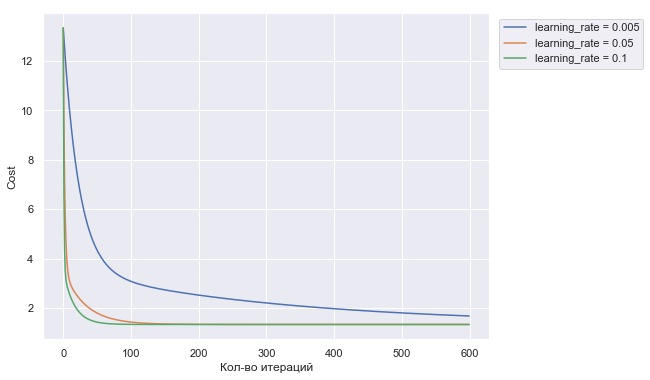

In [327]:
# градиентный спуск

reg = LinearRegression()

_, _, costs2 = reg.train_gradient_descent(X_train, y_train, learning_rate=0.05, n_iters=600)
_, _, costs3 = reg.train_gradient_descent(X_train, y_train, learning_rate=0.1, n_iters=600)
w_trained, b_trained, costs = reg.train_gradient_descent(X_train, y_train, learning_rate=0.005, n_iters=600)

fig = plt.figure(figsize=(8,6))
plt.plot(range(600), costs, label='learning_rate = 0.005')

plt.plot(range(600), costs2, label='learning_rate = 0.05')

plt.plot(range(600), costs3, label='learning_rate = 0.1')

plt.xlabel("Кол-во итераций")
plt.ylabel("Cost")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2)
plt.show()

In [328]:
# решение нормального уравнения

n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape

X_b_train = np.c_[np.ones((n_samples)), X_train]
X_b_test = np.c_[np.ones((n_samples_test)), X_test]

reg_normal = LinearRegression()
w_trained, b_trained = reg_normal.train_normal_equation(X_b_train, y_train)



In [329]:
# градиентный спуск на тестовой выборке

y_p_train = reg.predict(X_train)
y_p_test = reg.predict(X_test)

cost_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
cost_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Ф-я ошибок на обучающей выборке: {np.round(cost_train, 4)}")
print(f"Ф-я ошибок на тестовой выборке: {np.round(cost_test)}")

Ф-я ошибок на обучающей выборке: 1.6865
Ф-я ошибок на тестовой выборке: 2.0


In [330]:
# решение нормального уравнения - тестовая выборка

y_p_train = reg_normal.predict(X_b_train)
y_p_test_n = reg_normal.predict(X_b_test)

cost_train2 =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
cost_test2 =  (1 / n_samples_test) * np.sum((y_p_test_n - y_test) ** 2)

print(f"Ф-я ошибок на обучающей выборке: {np.round(cost_train2, 4)}")
print(f"Ф-я ошибок на тестовой выборке: {np.round(cost_test2)}")


Ф-я ошибок на обучающей выборке: 1.3441
Ф-я ошибок на тестовой выборке: 1.0


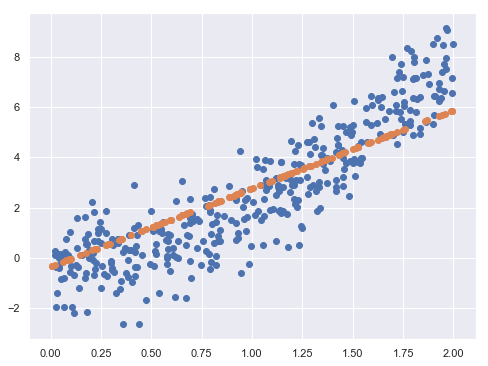

In [331]:
# посмотрим на тестовой выборке регрессию
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_p_test)
plt.show()

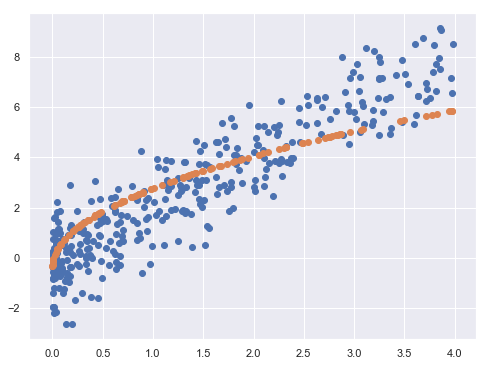

In [332]:
# добавим признак 2й степени от исходного

def transform_x(x):
    return [x[0] ** 2]

def transform(X):
    return np.apply_along_axis(transform_x, 1, X)

X_train = transform(X_train)
X_test = transform(X_test)

# решение нормального уравнения

n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape

X_b_train = np.c_[np.ones((n_samples)), X_train]
X_b_test = np.c_[np.ones((n_samples_test)), X_test]

reg_normal = LinearRegression()
w_trained, b_trained = reg_normal.train_normal_equation(X_b_train, y_train)

y_p_train = reg_normal.predict(X_b_train)
y_p_test_n = reg_normal.predict(X_b_test)

cost_train2 =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
cost_test2 =  (1 / n_samples_test) * np.sum((y_p_test_n - y_test) ** 2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0], y_train)
plt.scatter(X_test[:,0], y_p_test)
plt.show()

In [333]:
cost_train2 =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
cost_test2 =  (1 / n_samples_test) * np.sum((y_p_test_n - y_test) ** 2)

print(f"Ф-я ошибок на обучающей выборке: {np.round(cost_train2, 4)}")
print(f"Ф-я ошибок на тестовой выборке: {np.round(cost_test2)}")

Ф-я ошибок на обучающей выборке: 1.031
Ф-я ошибок на тестовой выборке: 1.0
